<a href="https://colab.research.google.com/github/DharmeshRV/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [1]:
# first import some important libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime

Now, I mount the drive to load the hotel data and create a dtaframe.

In [2]:
# mount the drive to get the data.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# copying the file path create the hotel dataframe
path='/content/drive/MyDrive/Colab Notebooks/Almabetter_Data Science/Capstone Projects/Hotel Booking Analysis - Dharmesh Kumar/Hotel Bookings.csv'
hotel_df=pd.read_csv(path)

A glance at newly created dataframe

In [4]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Now we get unique values in the columns with categorical data to undersrand the data stored in these columns.

In [6]:
# unique hotel types:
hotel_df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [7]:
# years in which bookings are made:
hotel_df["arrival_date_year"].unique()

array([2015, 2016, 2017])

In [8]:
# months in which guests arrive:
hotel_df["arrival_date_month"].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [9]:
# values in 'is_repeated_guest' column:
hotel_df["is_repeated_guest"].unique()

array([0, 1])

In [10]:
# unique meal types in the hotels:
hotel_df["meal"].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [11]:
# unique countries of origin:
hotel_df["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [12]:
# types of market segments:
hotel_df["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [13]:
# unique distribution channels:
hotel_df["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [14]:
# types of rooms reserved by guests:
hotel_df["reserved_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [15]:
# types of rooms assigned by hotels:
hotel_df["assigned_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [16]:
# number of booking changes:
hotel_df["booking_changes"].unique()

array([ 3,  4,  0,  1,  2,  5, 17,  6,  8,  7, 10, 16,  9, 13, 12, 20, 14,
       15, 11, 21, 18])

In [17]:
# unique deposit types:
hotel_df["deposit_type"].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [18]:
# type of agents:
hotel_df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [19]:
hotel_df['company'].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371., 383.,  86.,  82.,
       218.,  88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,
        51., 395., 102.,  34.,  84., 360., 394., 457., 382., 461., 478.,
       386., 112., 486., 421.,   9., 308., 135., 224., 504., 269., 356.,
       498., 390., 513., 203., 263., 477., 521., 169., 515., 445., 337.,
       251., 428., 292., 388., 130., 250., 355., 254., 543., 531., 528.,
        62., 120.,  42.,  81., 116., 530., 103.,  39.,  16.,  92.,  61.,
       501., 165., 291., 290.,  43., 325., 192., 108., 200., 465., 287.,
       297., 490., 482., 207., 282., 437., 225., 329., 272.,  28.,  77.,
       338.,  72., 246., 319., 146., 159., 380., 323., 511., 407., 278.,
        80., 403., 399.,  14., 137., 343., 346., 347., 349., 289., 351.,
       353.,  54.,  99., 358., 361., 362., 366., 37

In [20]:
# types of customers
hotel_df["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [21]:
# unique reservation stasus:
hotel_df["reservation_status"].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [22]:
# values in 'is_canceled' column:
hotel_df["is_canceled"].unique()

array([0, 1])

Understanding the column data

1. hotel: type of hotels
2. is_canceled: canceled or not
3. lead_time: no. of days before actual arrival in the hotel
4. arrival_date_year: year of booking
5. arrival_date_month: month of booking
6. arrival_date_week_number: week number of the year in which
   booking
7.arrival_date_day_of_month: arrival month date             
8. stays_in_weekend_nights: no. of weekends guest stayed
9. stays_in_week_nights: no. of weekdays guest stayed               
10. adults                                 
11. children                               
12. babies                                 
13. meal:   BB – Bed & Breakfast,     HB – only two meals including breakfast meal,     FB – breakfast, lunch, and dinner
14. country                              
15. market_segment:   TA: Travel agents,   TO: Tour operators                       
16. distribution_channel                 
17. is_repeated_guest                    
18. previous_cancellations: cancellation in past                 
19. previous_bookings_not_canceled: not cancelled in past        
20. reserved_room_type                     
21. assigned_room_type                     
22. booking_changes                        
23. deposit_type                           
24. agent                              
25. company                           
26. days_in_waiting_list                   
27. customer_type                          
28. adr: average daily rate
29. required_car_parking_spaces            
30. total_of_special_requests              
31. reservation_status                     
32. reservation_status_date

In [23]:
# Now we can drop irrelevant columns
hotel_df.drop("arrival_date_week_number",inplace=True,axis=1)

Now it's time for data wrangling. Frist, let's fix null values in our dataset.

In [24]:
hotel_df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
hotel                                  0
previous_bookings_not_canceled         0
reservation_status                     0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
is_repeated_guest                      0
previous_cancellations                 0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [25]:
# 'company' and 'agents' columns have large number of null values and they have float data so we fill them with 0.
hotel_df["company"].fillna(0, inplace=True)
hotel_df["agent"].fillna(0, inplace=True)

In [26]:
# there are some null values in 'country' column, we replace them with 'other'. we can also replace null values with the mode value as the datatype is 'object'. 
hotel_df["country"].fillna("other", inplace=True)

In [27]:
# 'children' column also have some null values and we will replace them with the median value.
hotel_df["children"].median()

0.0

In [28]:
# median values is 0
hotel_df["children"].fillna(hotel_df["children"].median(),inplace=True)

In [29]:
# the null values are fixed, let's see if there are any
hotel_df.isnull().sum().sort_values(ascending=False).head(5)

hotel                          0
previous_cancellations         0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

Data may have duplicated information so I check it as well.

In [30]:
# looking for duplicate entries. True shows duplicate row.
hotel_df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [31]:
# we drop the duplicate rows
hotel_df.drop_duplicates(inplace=True, ignore_index=True)

Feature engineering...

In [32]:
# We have three different columns for adults, children and babies so we introduce a column for total guests.
hotel_df["total_guests"]=hotel_df["adults"]+hotel_df["children"]+hotel_df["babies"]

In [33]:
# stays_in_week_nights and stays_in_weekend_nights are the two columns for stays so we get the total stay
hotel_df['total_stay']=hotel_df['stays_in_week_nights'] +hotel_df['stays_in_weekend_nights'] 

In [34]:
# the date year, month and day are in different columns so we create  a column 'arrival_date'.
hotel_df["arrival_date"]=hotel_df["arrival_date_month"]+" "+hotel_df["arrival_date_day_of_month"].astype(str)+" "+hotel_df["arrival_date_year"].astype(str)
hotel_df["arrival_date"]=pd.to_datetime(hotel_df["arrival_date"])

In [35]:
# calculating statistical measures
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,total_stay
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,...,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,...,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567,2.025253,3.630658
std,0.446466,86.052325,0.686102,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,...,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946,0.794319,2.763449
min,0.000000,0.000000,2015.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000,2.000000,2.000000
50%,0.000000,49.000000,2016.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000,2.000000,3.000000
75%,1.000000,125.000000,2017.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000,2.000000,5.000000
max,1.000000,737.000000,2017.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,...,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,55.000000,69.000000


In [36]:
# The min. for adults, children babies and total_guests is zero so we drop the rows if adults value is zero.
hotel_df=hotel_df[hotel_df["adults"]!=0]

# We'll also drop the rows with negative 'adr'.
hotel_df=hotel_df[hotel_df["adr"]>0]

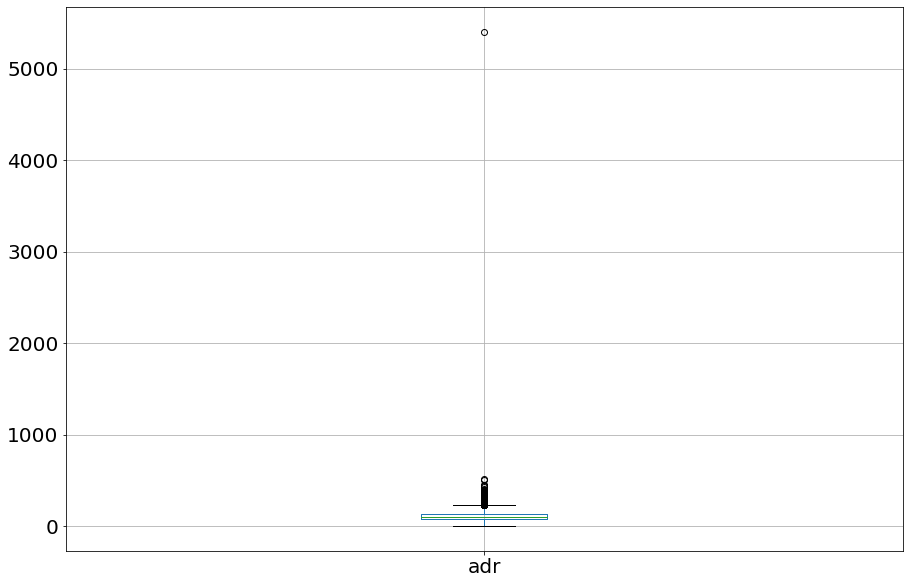

In [37]:
#checking outliers in adr column
plt.figure(figsize=(15,10))
hotel_df.boxplot(column="adr",fontsize=20, grid=True)

In [38]:
# adr has a very large value so remove the outliers to maintain the normality of data
from scipy import stats
q_low = hotel_df["adr"].quantile(0.01)
q_hi  = hotel_df["adr"].quantile(0.99)

hotel_df = hotel_df[(hotel_df["adr"] < q_hi) & (hotel_df["adr"] > q_low)]

Next I create the correlation heatmap to get the correlation matrix of the columns

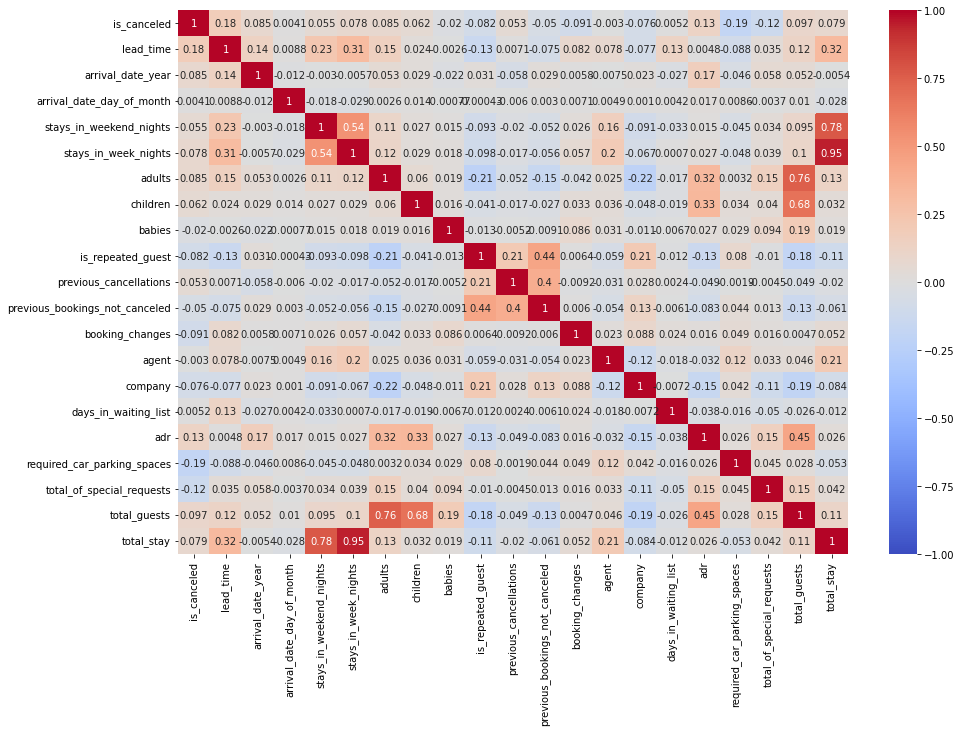

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(hotel_df.corr(), vmin=-1, cmap='coolwarm', annot=True)

correlation of adr with total guests is 0.45 and with other variables its even lower.

# Afer understanding and manipulating the data its time for Exploratory Data Analysis to examine trends and patterns for better understanding.

In [40]:
# calculating booking proportions of the two hotels
hotel_df["hotel"].value_counts(normalize=True)

City Hotel      0.619187
Resort Hotel    0.380813
Name: hotel, dtype: float64

Approximately 61.9% bookings are in city hotel and 38.1% in resort hotel.

Text(0.5, 1.0, 'Bookings For The Two Hotel Types')

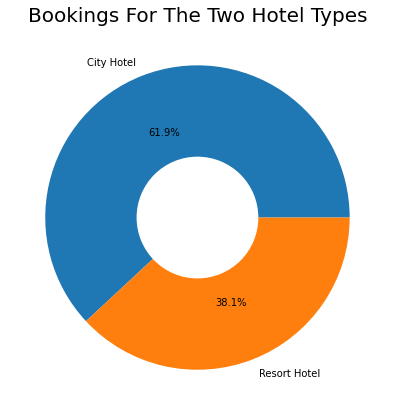

In [41]:
# plotting the percentage bookings of the two hotels.
plt.figure(figsize=(10,7))
plt.pie(hotel_df["hotel"].value_counts(),labels=('City Hotel','Resort Hotel'),autopct='%1.1f%%',radius=1)
plt.pie([1],colors=['w'],radius=0.4)
plt.title("Bookings For The Two Hotel Types",fontsize=20)

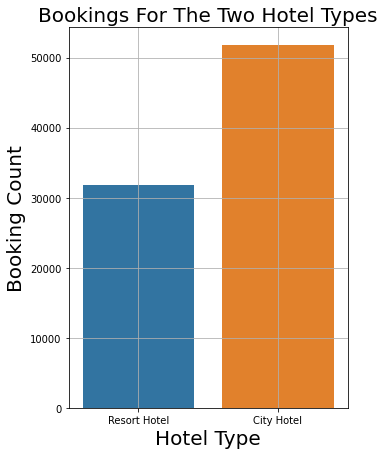

In [42]:
# Showing the booking count for the two hotel types

plt.rcParams['figure.figsize'] = (5,7)
sns.countplot(data=hotel_df,x='hotel')
plt.xlabel("Hotel Type",fontsize=20)
plt.title("Bookings For The Two Hotel Types",fontsize=20)
plt.ylabel("Booking Count",fontsize=20)
plt.grid(True)

In [43]:
# let me create different dataframes for the two hotel types
resort_df = hotel_df[hotel_df['hotel']=='Resort Hotel']
city_df = hotel_df[hotel_df['hotel']=='City Hotel']

In [44]:
# number of year-wise bookings in both the hotels
hotel_df.groupby('arrival_date_year')['hotel'].value_counts()

arrival_date_year  hotel       
2015               Resort Hotel     6348
                   City Hotel       6177
2016               City Hotel      25973
                   Resort Hotel    14577
2017               City Hotel      19580
                   Resort Hotel    10890
Name: hotel, dtype: int64

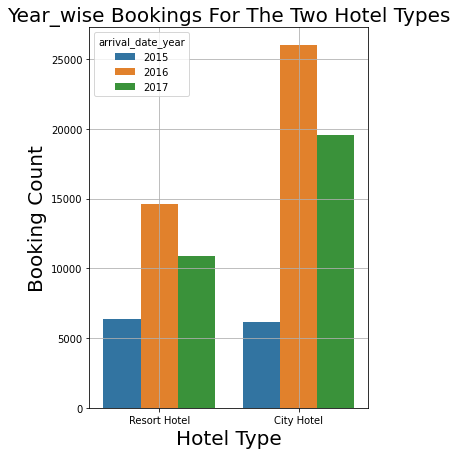

In [45]:
# plotting the year-wise bookings
sns.countplot(data=hotel_df, x='hotel',hue='arrival_date_year')
plt.title('Year_wise Bookings For The Two Hotel Types',fontsize=20)
plt.xlabel('Hotel Type',fontsize=20)
plt.ylabel('Booking Count',fontsize=20)
plt.grid(True)

In [46]:
# proportion of cancellations in both types of hotels
hotel_df.groupby('hotel')['is_canceled'].value_counts(normalize=True)

hotel         is_canceled
City Hotel    0              0.696056
              1              0.303944
Resort Hotel  0              0.762785
              1              0.237215
Name: is_canceled, dtype: float64

 More than 30% of total bookings are cancelled in city hotels and 23.7% in resort hotels.

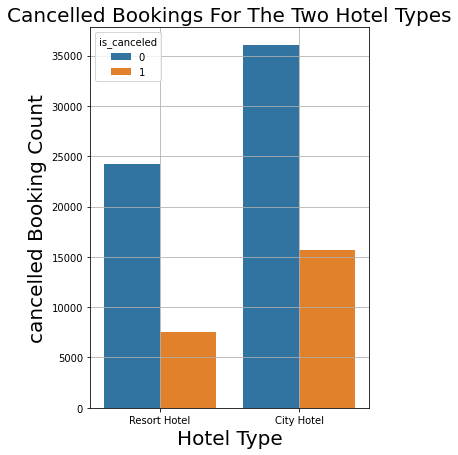

In [47]:
# showing the cancellation counts in both hotel types
sns.countplot(data=hotel_df,x='hotel',hue="is_canceled")
plt.xlabel("Hotel Type",fontsize=20)
plt.title("Cancelled Bookings For The Two Hotel Types",fontsize=20)
plt.ylabel("cancelled Booking Count",fontsize=20)
plt.grid(True)

In [48]:
# analyzing proportions of peferred room types
hotel_df.groupby("hotel")["reserved_room_type"].value_counts(normalize=True)

hotel         reserved_room_type
City Hotel    A                     0.714788
              D                     0.205258
              F                     0.031954
              E                     0.027257
              B                     0.014537
              G                     0.005993
              C                     0.000213
Resort Hotel  A                     0.545623
              D                     0.203049
              E                     0.138237
              G                     0.042024
              F                     0.030426
              C                     0.025397
              H                     0.014993
              L                     0.000157
              B                     0.000094
Name: reserved_room_type, dtype: float64

'A' type of room is most preferred in both the hotels

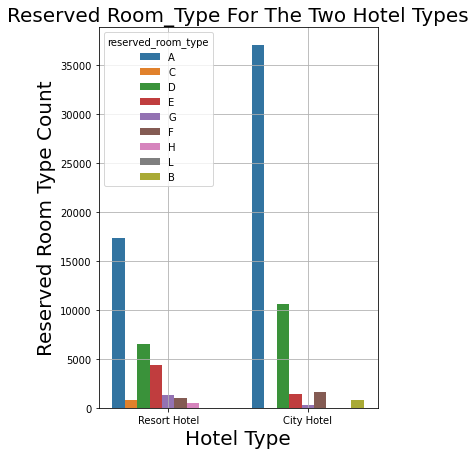

In [49]:
# showing preferred room types in the two types of hotels
sns.countplot(data=hotel_df,x='hotel',hue="reserved_room_type")
plt.xlabel("Hotel Type",fontsize=20)
plt.title("Reserved Room_Type For The Two Hotel Types",fontsize=20)
plt.ylabel("Reserved Room Type Count",fontsize=20)
plt.grid(True)

In [50]:
# analyzing preferred meal type
hotel_df.groupby('hotel')['meal'].value_counts(normalize=True)

hotel         meal     
City Hotel    BB           0.770172
              SC           0.178523
              HB           0.051228
              FB           0.000077
Resort Hotel  BB           0.792582
              HB           0.184001
              Undefined    0.013641
              FB           0.009587
              SC           0.000189
Name: meal, dtype: float64

'BB' type of meal is the most preferred in both the hotel types.

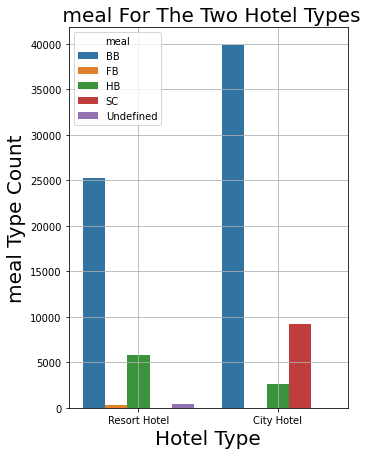

In [51]:
# plotting preferred meal types in the two types of hotels
sns.countplot(data=hotel_df,x='hotel',hue="meal")
plt.xlabel("Hotel Type",fontsize=20)
plt.title(" meal For The Two Hotel Types",fontsize=20)
plt.ylabel("meal Type Count",fontsize=20)
plt.grid(True)

In [52]:
# month-wise bookings in both types of hotels
hotel_df.groupby("hotel")["arrival_date_month"].value_counts()

hotel         arrival_date_month
City Hotel    August                6376
              July                  5570
              May                   5258
              April                 4951
              June                  4883
              March                 4730
              September             4095
              October               4050
              February              3470
              December              2878
              November              2831
              January               2638
Resort Hotel  August                4154
              July                  4070
              May                   2864
              April                 2756
              June                  2701
              October               2611
              March                 2444
              September             2394
              February              2309
              December              1877
              November              1840
              January   

August month has the highest number of bookings in both the hotel types and January has the least.

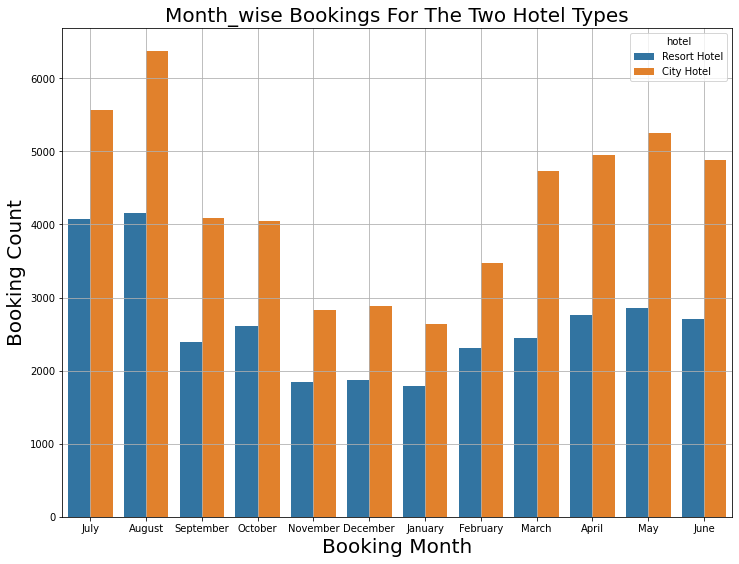

In [53]:
# Plotting the months against hotel type

plt.rcParams['figure.figsize'] = (12, 9)
sns.countplot(data=hotel_df,x="arrival_date_month",hue="hotel")
plt.xlabel("Booking Month",fontsize=20)
plt.title("Month_wise Bookings For The Two Hotel Types",fontsize=20)
plt.ylabel("Booking Count",fontsize=20)
plt.grid(True)

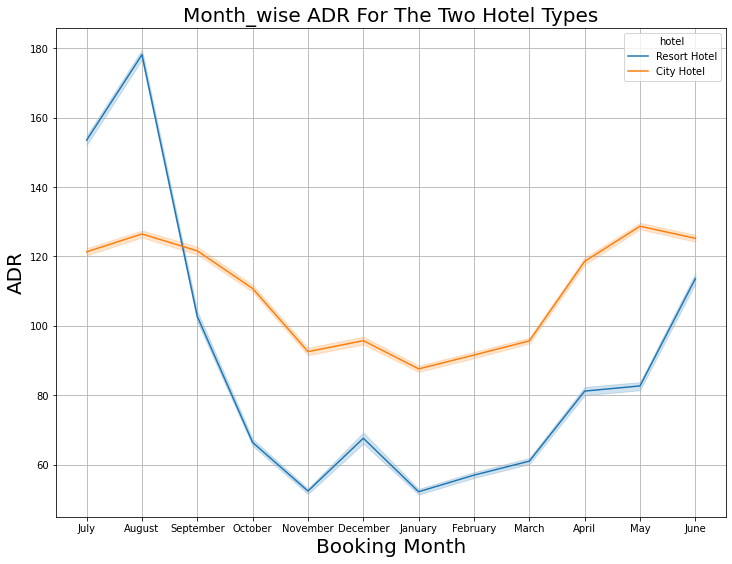

In [54]:
# plotting ADR vs month of booking
plt.rcParams['figure.figsize'] = (12, 9)
sns.lineplot(data=hotel_df,x="arrival_date_month",y='adr',hue="hotel")
plt.xlabel("Booking Month",fontsize=20)
plt.title("Month_wise ADR For The Two Hotel Types",fontsize=20)
plt.ylabel("ADR",fontsize=20)
plt.grid(True)

November, December, January and february have less ADR where January has the least.

In [55]:
# let's analyse the country-wise bookings
hotel_df["country"].value_counts(normalize=True).head(10)

PRT    0.301191
GBR    0.121659
FRA    0.103621
ESP    0.082351
DEU    0.063547
ITA    0.036100
IRL    0.035418
BEL    0.024298
BRA    0.023401
NLD    0.022431
Name: country, dtype: float64

30.1% guests are from Portugal.

In [56]:
# country-wise bookings in city hotel
city_df["country"].value_counts(normalize=True).head(10)

PRT    0.234119
FRA    0.141369
GBR    0.086372
DEU    0.085637
ESP    0.071854
ITA    0.050551
BEL    0.032167
BRA    0.030176
NLD    0.027296
USA    0.026716
Name: country, dtype: float64

In City hotel around 23% of all bookings were booked from Portugal followed by France(14%) & Great Britain(8.6%).

In [57]:
# country-wise bookings in resort hotel
resort_df["country"].value_counts(normalize=True).head(10)

PRT      0.410247
GBR      0.179035
ESP      0.099419
IRL      0.059720
FRA      0.042244
DEU      0.027628
CN       0.018513
NLD      0.014521
USA      0.013610
other    0.012636
Name: country, dtype: float64

In Resort hotel around 41% of all bookings were booked from Portugal followed by Great Britain(17%).

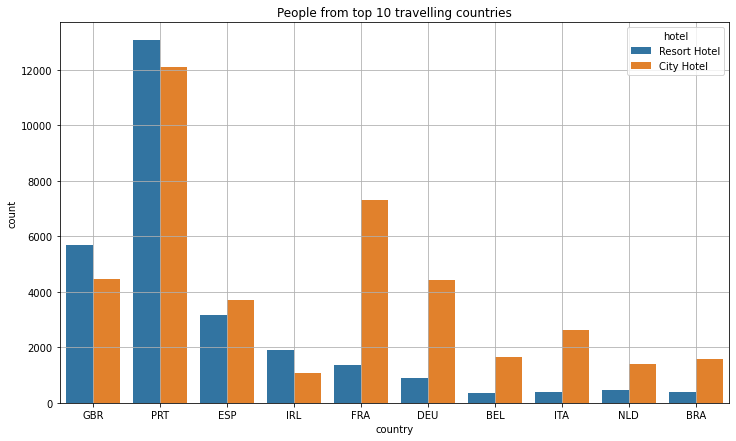

In [58]:
# showing the guests from top 10 countries

df=hotel_df[hotel_df['country'].isin(["PRT","GBR","FRA","ESP","DEU","ITA","IRL",
                         "BEL","BRA","NLD"])]
plt.rcParams['figure.figsize'] = (12, 7)
sns.countplot(x='country', hue = 'hotel', data= df)
plt.title('People from top 10 travelling countries')
plt.grid(True)

In [59]:
import plotly.express as px

In [67]:
# showing guests' country on map
temp=hotel_df['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})
map = px.choropleth(temp,locations=temp['country'],color=np.log(temp['count']),hover_name=temp['country'],
                    color_continuous_scale=px.colors.sequential.Plasma,title="Country of Guests")
map.show()

In [73]:
# average daily rate for total stay in resort hotels
resort_df.groupby("total_stay")["adr"].mean().sort_values()

total_stay
42     35.520000
35     39.876000
26     41.266667
45     42.110000
23     46.623333
27     49.950000
29     53.015000
25     56.210000
28     59.288929
21     67.895333
22     76.865000
33     77.000000
1      78.474890
18     79.968889
30     80.100000
17     92.089091
14     93.286417
2      94.510853
15     97.580690
19     97.862222
3     101.303551
4     102.806588
7     103.586768
16    104.931667
11    107.196444
10    107.317913
13    109.622333
69    110.000000
60    110.500000
5     114.741724
12    115.256692
8     116.753752
9     117.783815
6     125.954675
Name: adr, dtype: float64

42 nights of stay has the least adr which is 35.52$

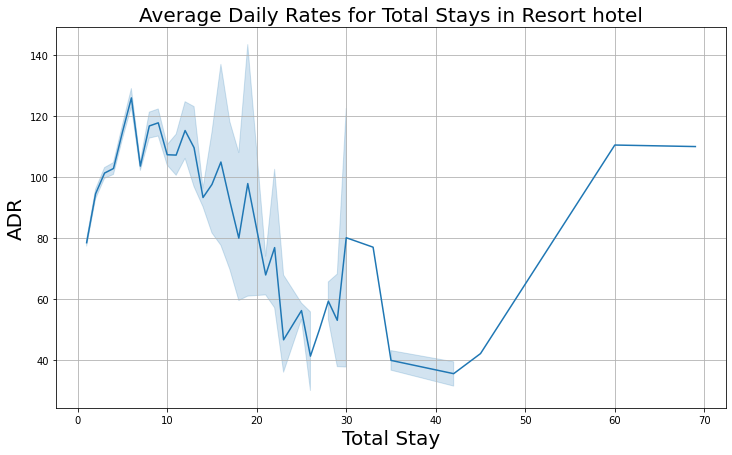

In [68]:
# showing adr for total stay in resort hotels
sns.lineplot(data=resort_df,x="total_stay", y="adr")
plt.xlabel("Total Stay",fontsize=20)
plt.title("Average Daily Rates for Total Stays in Resort hotel",fontsize=20)
plt.ylabel("ADR",fontsize=20)
plt.grid(True)

In [72]:
# adr for total stay in city hotels
city_df.groupby("total_stay")["adr"].mean().sort_values()

total_stay
20     80.170000
24     83.590000
30     83.955000
25     85.695000
27     89.616667
22     90.511667
34     93.000000
33     98.330000
28     99.030000
15    100.921892
16    103.461333
26    106.313333
19    106.823333
12    107.708772
18    107.715000
10    108.887419
17    110.323750
4     111.213564
5     111.586897
1     112.900274
8     113.480028
29    113.577000
2     113.607920
7     113.652083
6     113.833714
3     114.004316
11    116.229726
9     116.437552
23    119.115000
21    119.668000
14    121.916706
13    123.502973
Name: adr, dtype: float64

20 nights is the optimum length of stay in City Hotel for the best ADR which is 80.17$

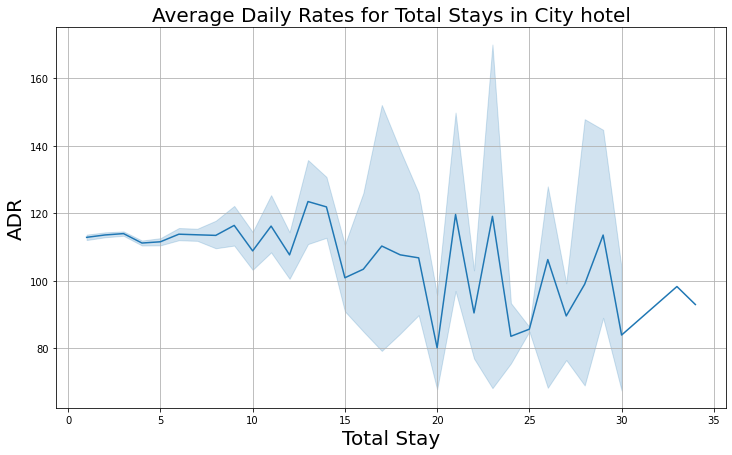

In [69]:
#  showing adr for total stay in city hotels
sns.lineplot(data=city_df,x="total_stay", y="adr")
plt.xlabel("Total Stay",fontsize=20)
plt.title("Average Daily Rates for Total Stays in City hotel",fontsize=20)
plt.ylabel("ADR",fontsize=20)
plt.grid(True)

In [71]:
# Analyzing ADR and total guests
hotel_df.groupby("total_guests")["adr"].mean().sort_values()

total_guests
1.0      84.315203
10.0     95.000000
2.0     103.355040
12.0    108.805000
3.0     143.299361
4.0     174.836318
5.0     187.669667
Name: adr, dtype: float64

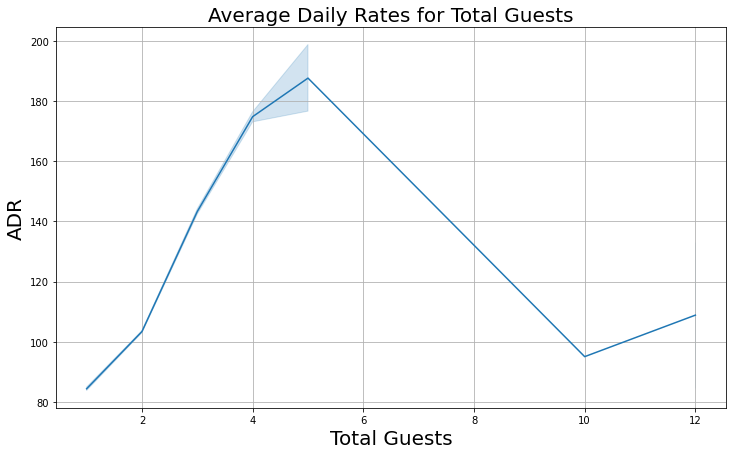

In [70]:
# plotting adr for total_guests 
sns.lineplot(data=hotel_df,x="total_guests", y="adr")
plt.xlabel("Total Guests",fontsize=20)
plt.title("Average Daily Rates for Total Guests",fontsize=20)
plt.ylabel("ADR",fontsize=20)
plt.grid(True)

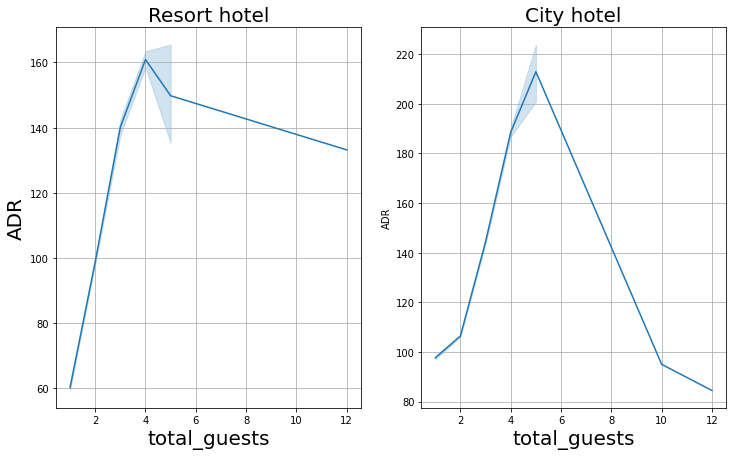

In [74]:
# plotting adr for total_guests in both types of hotels
plt.subplot(1,2,1)
sns.lineplot(data=resort_df,x='total_guests',y='adr')
plt.xlabel("total_guests",fontsize=20)
plt.title("Resort hotel",fontsize=20)
plt.ylabel("ADR",fontsize=20)
plt.grid(True)
plt.subplot(1,2,2)
sns.lineplot(data=city_df,x='total_guests',y='adr')
plt.xlabel("total_guests",fontsize=20)
plt.title("City hotel",fontsize=20)
plt.ylabel("ADR",fontsize=10)
plt.grid(True)

In [75]:
# adr vs total_of_special_requests
hotel_df.groupby('total_of_special_requests')['adr'].mean().sort_values()

total_of_special_requests
0    101.647635
1    110.330620
5    116.205455
2    118.904732
3    125.428611
4    130.809190
Name: adr, dtype: float64

ADR is increasing with total special requests

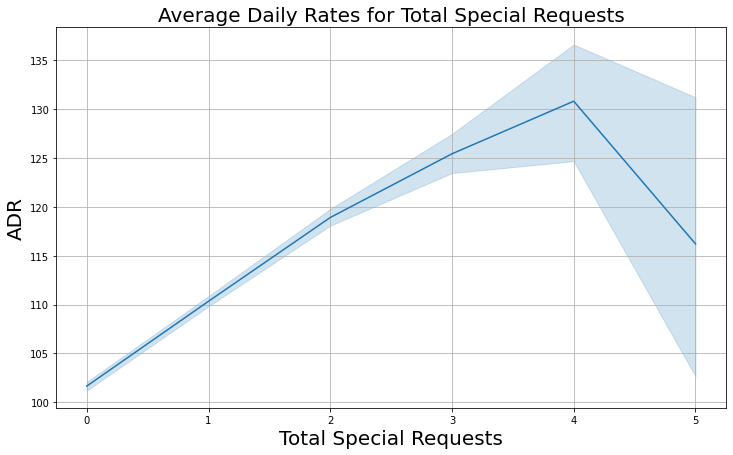

In [76]:
# plotting adr vs total_of_special_requests
sns.lineplot(data=hotel_df,x="total_of_special_requests", y="adr")
plt.xlabel("Total Special Requests",fontsize=20)
plt.title("Average Daily Rates for Total Special Requests",fontsize=20)
plt.ylabel("ADR",fontsize=20)
plt.grid(True)

In [78]:
# counting number of special requests
hotel_df['total_of_special_requests'].value_counts()

0    41666
1    28000
2    11373
3     2189
4      284
5       33
Name: total_of_special_requests, dtype: int64

In [80]:
# number of special requests in resort hotel
resort_df['total_of_special_requests'].value_counts()

0    16195
1    10446
2     4253
3      786
4      123
5       12
Name: total_of_special_requests, dtype: int64

In [81]:
# number of special requests in city hotel
city_df['total_of_special_requests'].value_counts()

0    25471
1    17554
2     7120
3     1403
4      161
5       21
Name: total_of_special_requests, dtype: int64

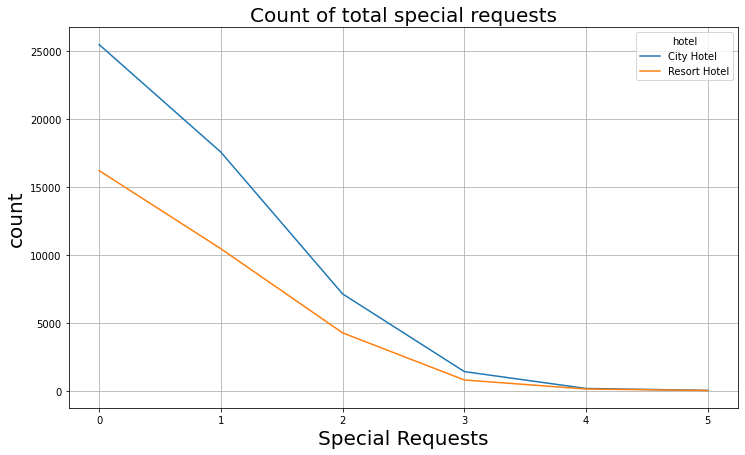

In [83]:
# plotting total special requests in both the hotel types
special_requests=hotel_df.groupby(['total_of_special_requests','hotel'])['hotel'].count().unstack()
special_requests.plot()
plt.xlabel("Special Requests",fontsize=20)
plt.title("Count of total special requests",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.grid(True)

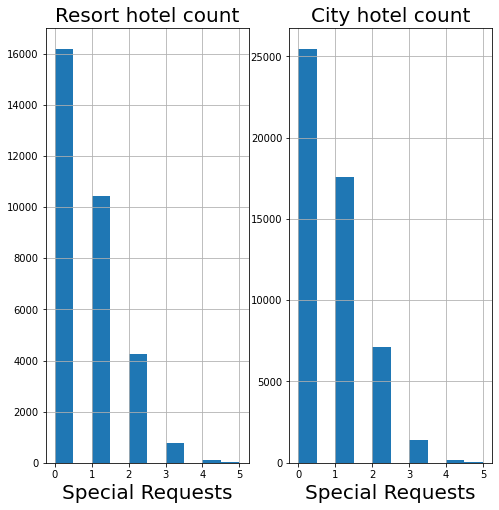

In [85]:
# plotting histogram of special requests
plt.rcParams['figure.figsize'] = (8, 8)
plt.subplot(1,2,1)
plt.hist(resort_df['total_of_special_requests'])
plt.xlabel("Special Requests",fontsize=20)
plt.title("Resort hotel count",fontsize=20)
plt.grid(True)


plt.subplot(1,2,2)
plt.hist(city_df['total_of_special_requests'])
plt.xlabel("Special Requests",fontsize=20)
plt.title("City hotel count",fontsize=20)
plt.grid(True)